<a href="https://colab.research.google.com/github/Nda22Kurniawan/project_ds/blob/main/ProjectDS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribusi Kelas:
Class
0.0    0.997805
1.0    0.002195
Name: proportion, dtype: float64


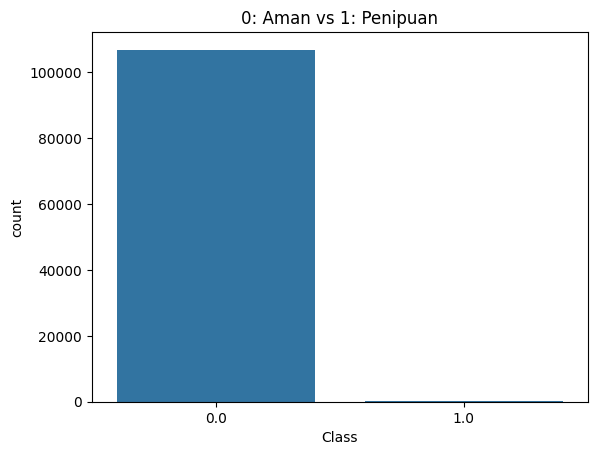

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('creditcard.csv')

print("Distribusi Kelas:")
print(df['Class'].value_counts(normalize=True))

sns.countplot(x='Class', data=df)
plt.title("0: Aman vs 1: Penipuan")
plt.show()

In [2]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
print("Jumlah baris kosong di kolom Class:", df['Class'].isnull().sum())

df.dropna(inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Split data berhasil! Ukuran data train:", X_train.shape)

Jumlah baris kosong di kolom Class: 1
Split data berhasil! Ukuran data train: (85636, 30)


In [6]:
from imblearn.over_sampling import SMOTE

print("Jumlah data Training sebelum SMOTE:\n", y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Jumlah data Training setelah SMOTE:\n", y_train_res.value_counts())

Jumlah data Training sebelum SMOTE:
 Class
0.0    85448
1.0      188
Name: count, dtype: int64
Jumlah data Training setelah SMOTE:
 Class
0.0    85448
1.0    85448
Name: count, dtype: int64


In [7]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

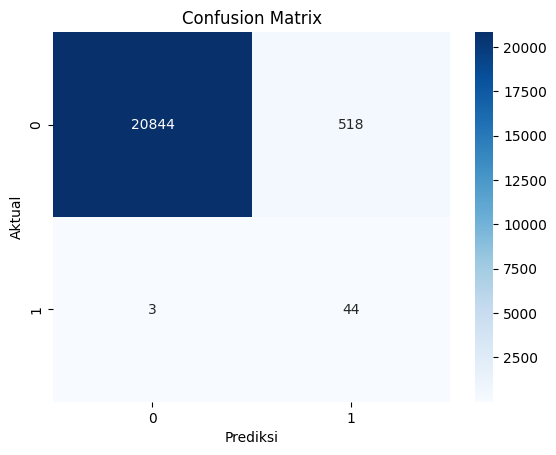

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     21362
         1.0       0.08      0.94      0.14        47

    accuracy                           0.98     21409
   macro avg       0.54      0.96      0.57     21409
weighted avg       1.00      0.98      0.99     21409



In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Laporan Lengkap
print(classification_report(y_test, y_pred))

# Deep Learning

/tmp/ipython-input-770820078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_code, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


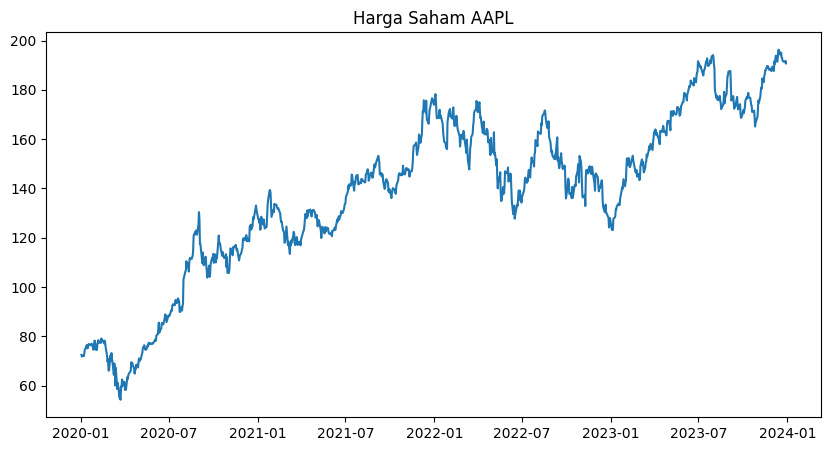

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_code = 'AAPL'
data = yf.download(stock_code, start='2020-01-01', end='2024-01-01')

df = data[['Close']]

plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title(f'Harga Saham {stock_code}')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Cek hasil scaling (harus 0-1)
print(scaled_data[:5])

[[0.12820376]
 [0.12324186]
 [0.12726911]
 [0.12487324]
 [0.13302956]]


In [11]:
prediction_days = 60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Shape X_train:", X_train.shape)

Shape X_train: (946, 60, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=25, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.1675
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0119
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0076
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0067
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0067
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0058
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0052
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0054
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0049
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0044
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0046
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043
Epoch 13/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0046
Epoch 14/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0042
Epoch 15/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0036
Ep

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


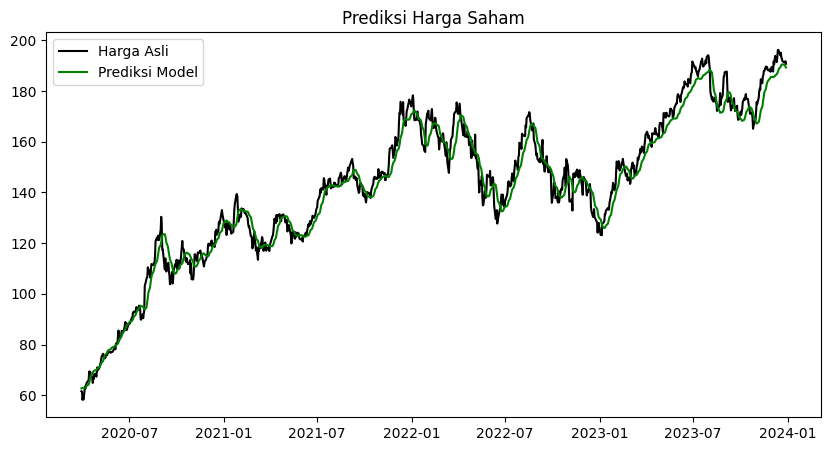

In [13]:
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices) # Kembalikan ke harga asli (Dollar/Rupiah)

plt.figure(figsize=(10,5))
plt.plot(df.index[prediction_days:], df['Close'][prediction_days:], color='black', label='Harga Asli')
plt.plot(df.index[prediction_days:], predicted_prices, color='green', label='Prediksi Model')
plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()